<a href="https://colab.research.google.com/github/barta3235/working_model_vgg16/blob/main/working_model_vgg16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from zipfile import ZipFile
import os,glob
import cv2
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense,MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten
import cv2
import matplotlib.pyplot as plt
!pip install lime
from lime.lime_image import LimeImageExplainer
import skimage.color as color
from skimage.segmentation import mark_boundaries


<ipython-input-2-82c7ab70f70f>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  from tqdm._tqdm_notebook import tqdm_notebook as tqdm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=339fb1a17e66fa0e7cab90554609f40989d535b40c60beb7659a40e524163c34
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.chdir('/content/drive/MyDrive/499_brainMRI_dataset/Ohyes')
X = []
y = []
for i in tqdm(os.listdir()):
      img = cv2.imread(i)
      img = cv2.resize(img,(224,224))
      X.append(img)
      y.append((i[0:1]))
      print(i[0:1])
os.chdir('/content/drive/MyDrive/499_brainMRI_dataset/noppers')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)
      img = cv2.resize(img,(224,224))
      X.append(img)
print(len(X))
for i in range(1,3245):
    y.append('N')
print(y)

  0%|          | 0/4273 [00:00<?, ?it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


  0%|          | 0/3244 [00:00<?, ?it/s]

7517
['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',

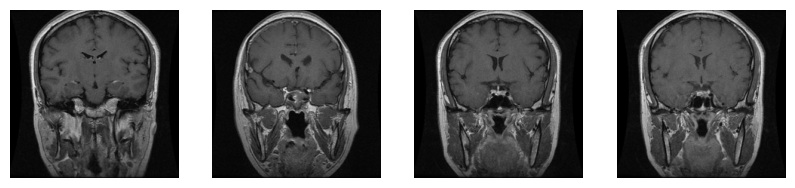

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(X[i], cmap="gray")
    plt.axis('off')
plt.show()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print ("Shape of an image in X_train: ", X_train[0].shape)
print ("Shape of an image in X_test: ", X_test[0].shape)

Shape of an image in X_train:  (224, 224, 3)
Shape of an image in X_test:  (224, 224, 3)


In [ ]:
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)
y_train = np.array(y_train)
X_train = np.array(X_train)
y_test = np.array(y_test)
X_test = np.array(X_test)
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)

X_train Shape:  (5036, 224, 224, 3)
X_test Shape:  (2481, 224, 224, 3)
y_train Shape:  (5036, 2)
y_test Shape:  (2481, 2)


In [ ]:
from keras.applications import vgg16


img_rows, img_cols = 224, 224


vgg = vgg16.VGG16(weights = 'imagenet',
                 include_top = False,
                 input_shape = (img_rows, img_cols, 3))

#freeze the last 4 layers

for layer in vgg.layers:
    layer.trainable = False

for (i,layer) in enumerate(vgg.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)

58889256/58889256 [==============================] - 0s 0us/step
0 InputLayer False
1 Conv2D False
2 Conv2D False
3 MaxPooling2D False
4 Conv2D False
5 Conv2D False
6 MaxPooling2D False
7 Conv2D False
8 Conv2D False
9 Conv2D False
10 MaxPooling2D False
11 Conv2D False
12 Conv2D False
13 Conv2D False
14 MaxPooling2D False
15 Conv2D False
16 Conv2D False
17 Conv2D False
18 MaxPooling2D False


In [ ]:
def lw(bottom_model, num_classes):
    """creates the top or head of the model that will be
    placed ontop of the bottom layers"""

    top_model = bottom_model.output
    top_model = Conv2D(256, (3, 3), activation='relu')(top_model)
    top_model = GlobalAveragePooling2D()(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(512,activation='relu')(top_model)
    top_model = Dense(num_classes,activation='softmax')(top_model)
    return top_model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

from keras.models import Model


num_classes = 2

FC_Head = lw(vgg, num_classes)

model = Model(inputs = vgg.input, outputs = FC_Head)

print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy',
                       tf.keras.metrics.TrueNegatives(),
                       tf.keras.metrics.FalsePositives(),
                       tf.keras.metrics.SpecificityAtSensitivity(0.5)])

In [ ]:
history = model.fit(X_train,y_train,
                    epochs=5,
                    validation_data=(X_test,y_test),
                    verbose = 1,
                    initial_epoch=0)

Epoch 1/5
158/158 [==============================] - 4565s 29s/step - loss: 0.5658 - accuracy: 0.9396 - true_negatives: 4732.0000 - false_positives: 304.0000 - specificity_at_sensitivity: 0.9843 - val_loss: 0.1024 - val_accuracy: 0.9722 - val_true_negatives: 2412.0000 - val_false_positives: 69.0000 - val_specificity_at_sensitivity: 0.9948
Epoch 2/5
158/158 [==============================] - 4518s 29s/step - loss: 0.0566 - accuracy: 0.9809 - true_negatives: 4940.0000 - false_positives: 96.0000 - specificity_at_sensitivity: 0.9982 - val_loss: 0.0735 - val_accuracy: 0.9758 - val_true_negatives: 2421.0000 - val_false_positives: 60.0000 - val_specificity_at_sensitivity: 0.9984
Epoch 3/5
158/158 [==============================] - 4522s 29s/step - loss: 0.0237 - accuracy: 0.9940 - true_negatives: 5006.0000 - false_positives: 30.0000 - specificity_at_sensitivity: 0.9994 - val_loss: 0.0925 - val_accuracy: 0.9786 - val_true_negatives: 2428.0000 - val_false_positives: 53.0000 - val_specificity_at

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from lime import lime_image
from skimage.segmentation import mark_boundaries
from tensorflow.keras.models import load_model
import cv2
from lime.lime_image import LimeImageExplainer


**LIME Explanation**

**Test One**

  0%|          | 0/100 [00:00<?, ?it/s]

1/1 [==============================] - 5s 5s/step


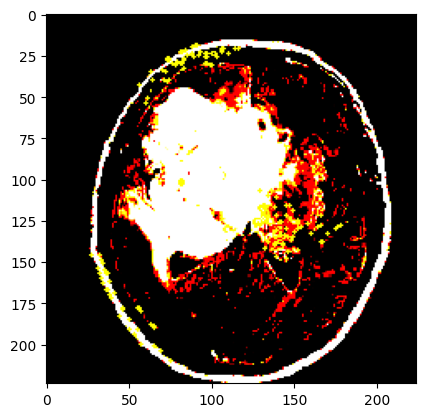

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from lime import lime_image
from skimage.segmentation import mark_boundaries
from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/work_temp/model_vgg16_new')

# Function to load and preprocess the image
def load_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    # Adjust preprocessing as needed for your model
    img = preprocess_input(img)  # Make sure this matches your model's expected input
    return img

# Adjust this prediction function as per your model's requirements
def predict(model, img_array):
    preds = model.predict(img_array)
    return preds

# Function to explain an instance with LIME
def explain_instance_with_lime(model, img_path, top_labels=2, hide_color=0, num_samples=100):
    explainer = lime_image.LimeImageExplainer()
    img = load_image(img_path)
    explanation = explainer.explain_instance(img[0].astype('double'),
                                             classifier_fn=lambda x: predict(model, x),
                                             top_labels=top_labels,
                                             hide_color=hide_color,
                                             num_samples=num_samples)
    temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
    plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
    plt.show()

# Assuming 'model' is your fine-tuned model with the provided compilation parameters

# Path to your test image
img_path = '/content/drive/MyDrive/sampleImagesToTest/Y2.jpg'  # Update this with the actual path to your image

# Use the function to explain a prediction
explain_instance_with_lime(model, img_path)


**Test Two**

  0%|          | 0/100 [00:00<?, ?it/s]

1/1 [==============================] - 5s 5s/step


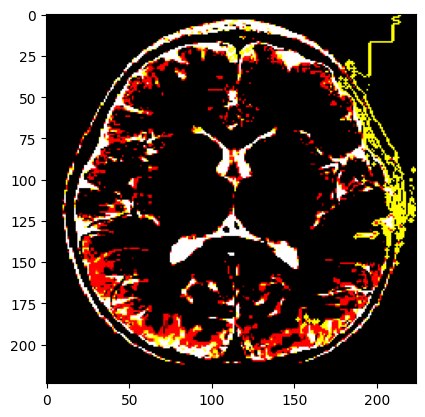

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from lime import lime_image
from skimage.segmentation import mark_boundaries
from tensorflow.keras.applications.vgg16 import preprocess_input

model = load_model('/content/drive/MyDrive/work_temp/model_vgg16_new')

# Function to load and preprocess the image
def load_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    # Adjust preprocessing as needed for your model
    img = preprocess_input(img)  # Make sure this matches your model's expected input
    return img

# Adjust this prediction function as per your model's requirements
def predict(model, img_array):
    preds = model.predict(img_array)
    return preds

# Function to explain an instance with LIME
def explain_instance_with_lime(model, img_path, top_labels=2, hide_color=0, num_samples=100):
    explainer = lime_image.LimeImageExplainer()
    img = load_image(img_path)
    explanation = explainer.explain_instance(img[0].astype('double'),
                                             classifier_fn=lambda x: predict(model, x),
                                             top_labels=top_labels,
                                             hide_color=hide_color,
                                             num_samples=num_samples)
    temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
    plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
    plt.show()

# Assuming 'model' is your fine-tuned model with the provided compilation parameters

# Path to your test image
img_path = '/content/drive/MyDrive/sampleImagesToTest/4 no.jpg'  # Update this with the actual path to your image

# Use the function to explain a prediction
explain_instance_with_lime(model, img_path)


**Test 3**

  0%|          | 0/100 [00:00<?, ?it/s]

1/1 [==============================] - 1s 777ms/step


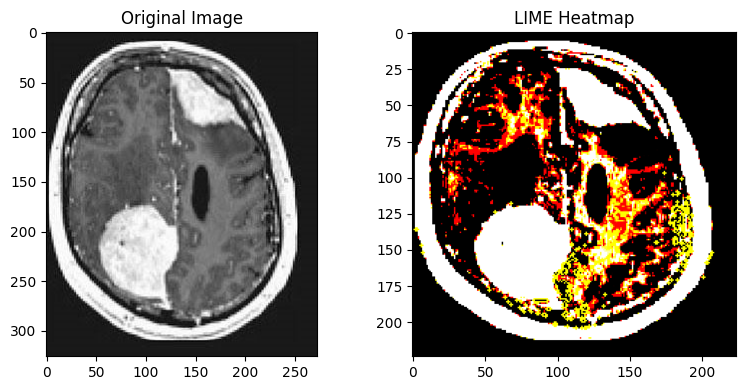

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from lime import lime_image
from skimage.segmentation import mark_boundaries

# Load the pre-trained VGG16 model from your drive
model = load_model('/content/drive/MyDrive/work_temp/model_vgg16_new')

# Load and preprocess the image
def load_image(img_path, model_preprocess=preprocess_input, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = model_preprocess(img_array)
    return img_array

# Specify the path to your image
img_path = '/content/drive/MyDrive/sampleImagesToTest/Y2N (21).jpg'
img_array = load_image(img_path)

# Initialize a LimeImageExplainer
explainer = lime_image.LimeImageExplainer()

# Explain the prediction of the model on the input image
explanation = explainer.explain_instance(img_array[0], model.predict, top_labels=2, hide_color=0, num_samples=100)

# Get the mask for the explanation of the top class (assuming binary classification)
temp, mask = explanation.get_image_and_mask(model.predict(img_array).argmax(axis=1)[0], positive_only=True, negative_only=False, hide_rest=False)

# Plot the original image and the explanation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

# Original image
ax1.imshow(image.load_img(img_path))
ax1.set_title('Original Image')

# Lime heatmap
ax2.imshow(mark_boundaries(temp / 2 + 0.5, mask))
ax2.set_title('LIME Heatmap')

plt.tight_layout()
plt.show()


**Super Pixel Boundaries**

**Test One**

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 5s 5s/step


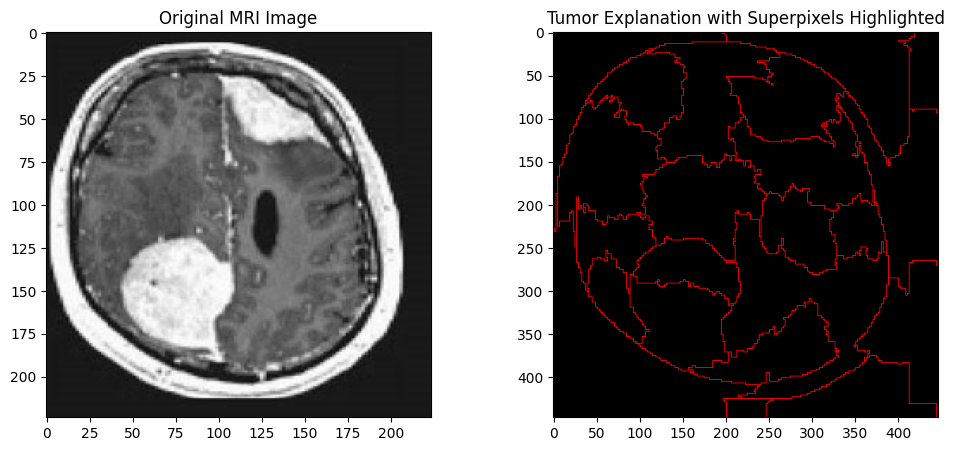

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from lime.lime_image import LimeImageExplainer
import skimage.color as color
from skimage.segmentation import mark_boundaries

model_path = '/content/drive/MyDrive/work_temp/model_vgg16_new'  # Update with your model path
model = tf.keras.models.load_model(model_path)

def predict_tumor_presence(images):
    predictions = model.predict(images)
    return predictions

explainer = LimeImageExplainer()


def process_mri_image(file_path):
    uploaded_image = cv2.imread(file_path)
    uploaded_image = cv2.resize(uploaded_image, (224, 224))

    explanation = explainer.explain_instance(uploaded_image, predict_tumor_presence, top_labels=1, num_samples=1000)

    perturbed_image = explanation.segments

    perturbed_rgb_image = color.gray2rgb(perturbed_image)
    superpixel_boundaries = mark_boundaries(perturbed_rgb_image, perturbed_image, color=(1, 0, 0), mode='subpixel')

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(uploaded_image)
    plt.title('Original MRI Image')

    plt.subplot(1, 2, 2)
    plt.imshow(superpixel_boundaries)
    plt.title('Tumor Explanation with Superpixels Highlighted')
    plt.show()

uploaded_image_path = '/content/drive/MyDrive/sampleImagesToTest/Y2N (21).jpg'
process_mri_image(uploaded_image_path)

**Test Two**

  0%|          | 0/100 [00:00<?, ?it/s]

1/1 [==============================] - 5s 5s/step


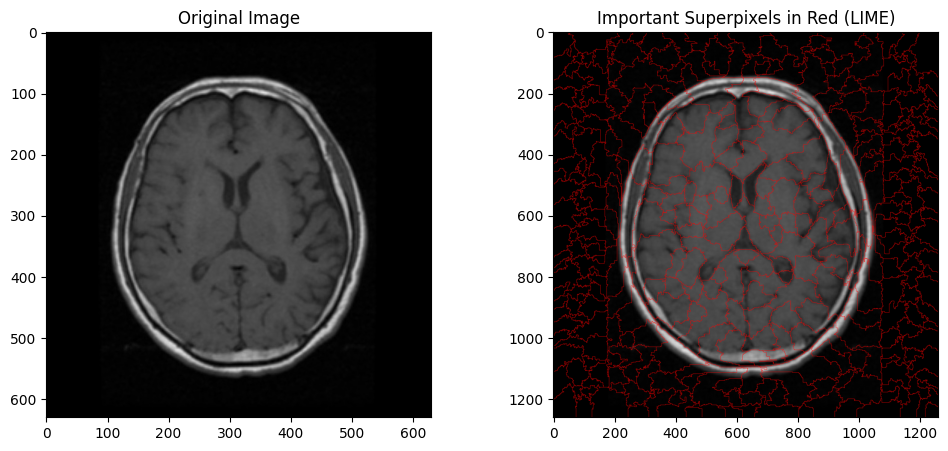

In [ ]:
import tensorflow as tf
import numpy as np
from skimage.segmentation import mark_boundaries
from lime.lime_image import LimeImageExplainer
import cv2  # Import OpenCV for image processing
import matplotlib.pyplot as plt

def predict_fn(images):
    images = np.array([cv2.resize(img, (224, 224)) for img in images])
    predictions = model.predict(images)
    return predictions

explainer = LimeImageExplainer()

sample_index = 0
selected_image_path = '/content/drive/MyDrive/sampleImagesToTest/48 no.jpeg'  # Specify the file path to the image
selected_label = 'Y'

selected_image = cv2.imread(selected_image_path)  # Load the image using OpenCV

explanation = explainer.explain_instance(selected_image, predict_fn, top_labels=1, num_samples=100)

perturbed_image = explanation.segments

superpixel_boundaries = mark_boundaries(selected_image, perturbed_image, color=(1, 0, 0), mode='subpixel')

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(selected_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(superpixel_boundaries)
plt.title('Important Superpixels in Red (LIME)')
plt.show()


**Test Three**

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 5s 5s/step


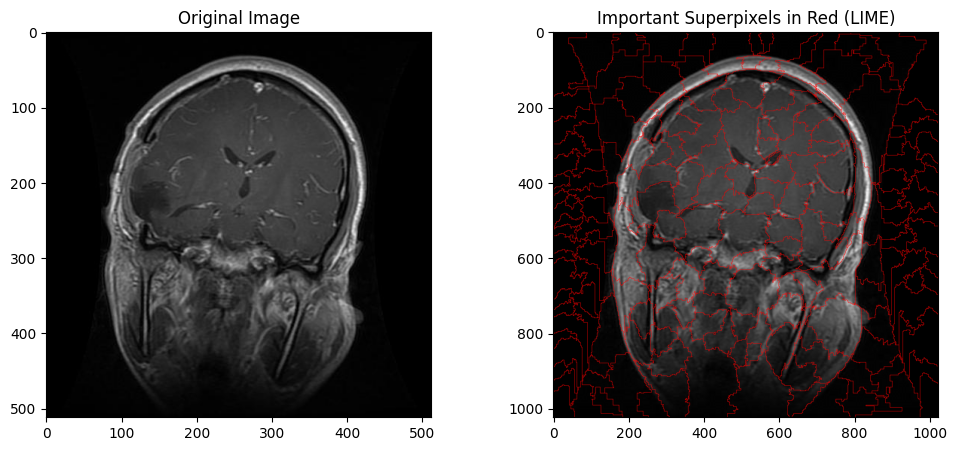

In [ ]:
import tensorflow as tf
import numpy as np
from skimage.segmentation import mark_boundaries
!pip install lime
from lime.lime_image import LimeImageExplainer
import cv2
import matplotlib.pyplot as plt

# Load your pre-trained model
model_path = '/content/drive/MyDrive/work_temp/model_vgg16_new'  # Update with your model path
model = tf.keras.models.load_model(model_path)

def predict_fn(images):
    images = np.array([cv2.resize(img, (224, 224)) for img in images])
    predictions = model.predict(images)
    return predictions

explainer = LimeImageExplainer()

sample_index = 0
selected_image_path = '/content/drive/MyDrive/BadDay/Y2N (3007).jpg'  # Specify the file path to the image
selected_label = 'Y'

selected_image = cv2.imread(selected_image_path)  # Load the image using OpenCV

explanation = explainer.explain_instance(selected_image, predict_fn, top_labels=1, num_samples=1000)

perturbed_image = explanation.segments

superpixel_boundaries = mark_boundaries(selected_image, perturbed_image, color=(1, 0, 0), mode='subpixel')

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(selected_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(superpixel_boundaries)
plt.title('Important Superpixels in Red (LIME)')
plt.show()


  0%|          | 0/2000 [00:00<?, ?it/s]

1/1 [==============================] - 4s 4s/step


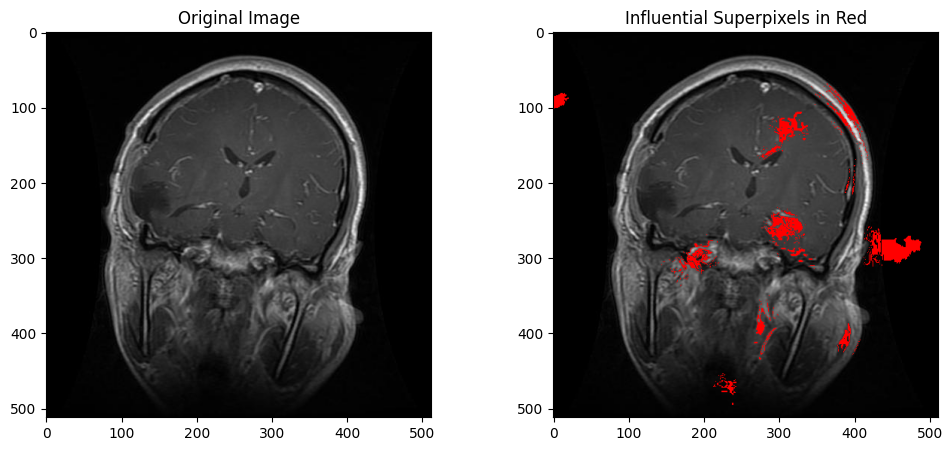

In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from lime.lime_image import LimeImageExplainer

# Load your pre-trained model
model_path = '/content/drive/MyDrive/work_temp/model_vgg16_new'
model = tf.keras.models.load_model(model_path)

def predict_fn(images):
    images = np.array([cv2.resize(img, (224, 224)) for img in images])
    predictions = model.predict(images)
    return predictions

explainer = LimeImageExplainer()

selected_image_path = '/content/drive/MyDrive/BadDay/Y2N (3007).jpg'
selected_image = cv2.imread(selected_image_path)

# Get the explanation for the image
explanation = explainer.explain_instance(selected_image.astype('double'), predict_fn, top_labels=1, num_samples=2000)

# Retrieve the mask for the top 1 label and convert segments into full red color for influential superpixels
label_to_explain = explanation.top_labels[0]
temp, mask = explanation.get_image_and_mask(label_to_explain, positive_only=True, num_features=10, hide_rest=False)

# Create a new image that overlays the important superpixels in red
masked_image = selected_image.copy()
for i in range(mask.shape[0]):
    for j in range(mask.shape[1]):
        if mask[i, j]:
            masked_image[i, j] = [0, 0, 255]  # Red color in BGR format

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(selected_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
plt.title('Influential Superpixels in Red')
plt.show()


**Model Save**

In [ ]:
model.save('/content/drive/MyDrive/work_temp/model_vgg16_new')

**Testing model**

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np

# Specify the path to your model
model_path = '/content/drive/MyDrive/work_temp/model_vgg16_new'

# Load the pre-trained model
model = load_model(model_path)

# Specify the path to the uploaded image
uploaded_image_path = '/content/drive/MyDrive/sampleImagesToTest/Y2.jpg'

# Load and preprocess the image
img = image.load_img(uploaded_image_path, target_size=(224, 224))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)

# Make the prediction
prediction = model.predict(img)

# Interpret the prediction
if prediction[0][0] > prediction[0][1]:
    result = "No Tumor"
else:
    result = "Tumor"

print("Prediction: ", result)


1/1 [==============================] - 1s 505ms/step
Prediction:  Tumor


In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np

# Specify the path to your model
model_path = '/content/drive/MyDrive/work_temp/model_vgg16_new'

# Load the pre-trained model
model = load_model(model_path)

# Specify the path to the uploaded image
uploaded_image_path = '/content/drive/MyDrive/sampleImagesToTest/4 no.jpg'

# Load and preprocess the image
img = image.load_img(uploaded_image_path, target_size=(224, 224))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)

# Make the prediction
prediction = model.predict(img)

# Interpret the prediction
if prediction[0][0] > prediction[0][1]:
    result = "No Tumor"
else:
    result = "Tumor"

print("Prediction: ", result)


1/1 [==============================] - 1s 510ms/step
Prediction:  No Tumor


**Grad-CAM**

**Test One**

In [3]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np

# Specify the path to your model
model_path = '/content/drive/MyDrive/work_temp/model_vgg16_new'

# Load the pre-trained model
model = load_model(model_path)

# Specify the path to the uploaded image
uploaded_image_path = '/content/drive/MyDrive/sampleImagesToTest/Y2.jpg'

# Load and preprocess the image
img = image.load_img(uploaded_image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array_expanded_dims = np.expand_dims(img_array, axis=0)
img = preprocess_input(img_array_expanded_dims)

# Make the prediction
prediction = model.predict(img)

# Interpret the prediction
probability = prediction[0][1]
if probability > 0.5:
    result = "Tumor"
else:
    result = "No Tumor"

print("Prediction: ", result)
print("Probability: {:.2f}%".format(probability * 100))


1/1 [==============================] - 1s 725ms/step
Prediction:  Tumor
Probability: 100.00%


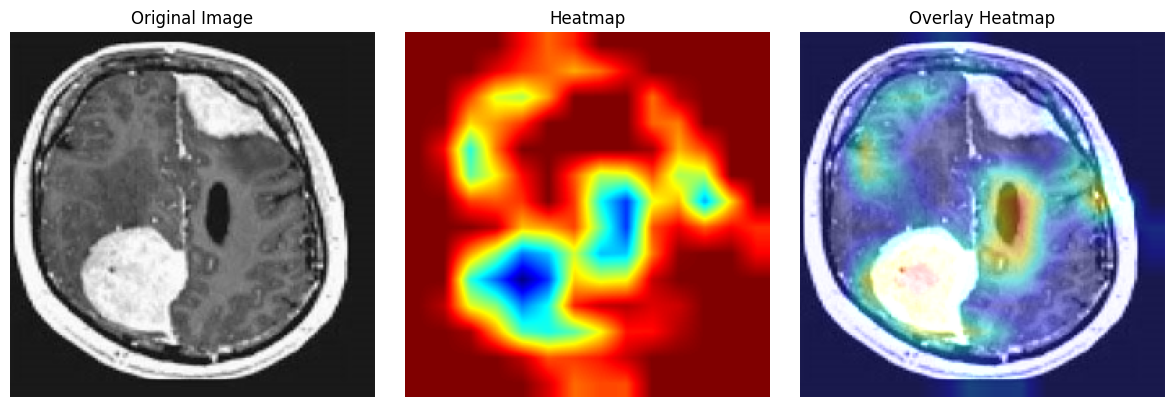

<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt
import cv2


# Preprocess the image
def load_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded_dims)

# Load and preprocess your image
img_path = '/content/drive/MyDrive/sampleImagesToTest/Y2N (21).jpg'  # Update with your path
preprocessed_img = load_preprocess_image(img_path)

# Grad-CAM algorithm
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# Create the heatmap
last_conv_layer_name = 'block5_conv3'  # Update with your last conv layer name
heatmap = make_gradcam_heatmap(preprocessed_img, model, last_conv_layer_name)

# Superimpose the heatmap over the original image
def save_and_display_gradcam(img_path, heatmap, alpha=0.4):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))  # Resize to the same size as model input
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))  # Resize heatmap
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = heatmap * alpha + img
    superimposed_img = np.clip(superimposed_img, 0, 255).astype(np.uint8)

    # Create a figure to display original, heatmap, and overlay
    plt.figure(figsize=(12, 4))

    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    # Heatmap
    plt.subplot(1, 3, 2)
    plt.imshow(heatmap)
    plt.title('Heatmap')
    plt.axis('off')

    # Overlay
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.title('Overlay Heatmap')
    plt.axis('off')

    # Show and save the figure
    plt.tight_layout()
    plt.show()
    plt.savefig('/content/drive/MyDrive/work_temp/gradcam_composite.jpg')

# Apply Grad-CAM
save_and_display_gradcam(img_path, heatmap)


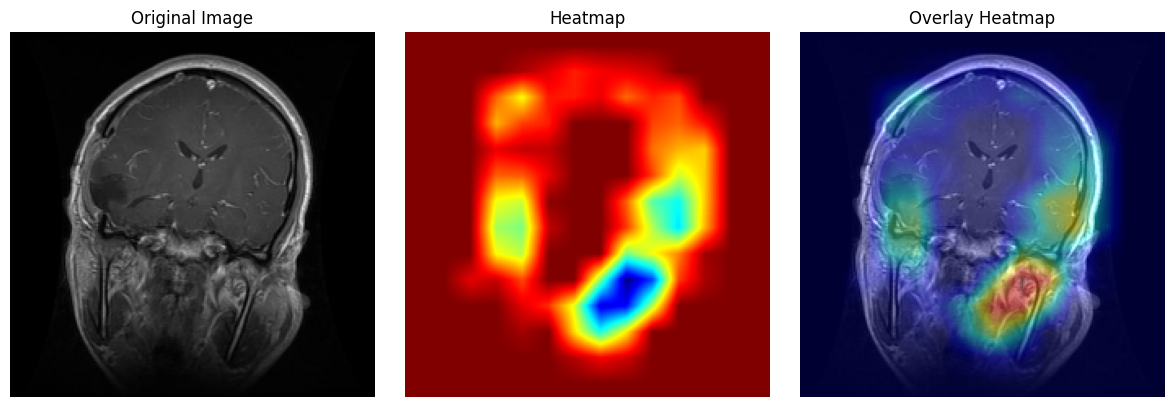

<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt
import cv2


# Preprocess the image
def load_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded_dims)

# Load and preprocess your image
img_path = '/content/drive/MyDrive/BadDay/Y2N (3007).jpg'  # Update with your path
preprocessed_img = load_preprocess_image(img_path)

# Grad-CAM algorithm
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# Create the heatmap
last_conv_layer_name = 'block5_conv3'  # Update with your last conv layer name
heatmap = make_gradcam_heatmap(preprocessed_img, model, last_conv_layer_name)

# Superimpose the heatmap over the original image
def save_and_display_gradcam(img_path, heatmap, alpha=0.4):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))  # Resize to the same size as model input
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))  # Resize heatmap
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = heatmap * alpha + img
    superimposed_img = np.clip(superimposed_img, 0, 255).astype(np.uint8)

    # Create a figure to display original, heatmap, and overlay
    plt.figure(figsize=(12, 4))

    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    # Heatmap
    plt.subplot(1, 3, 2)
    plt.imshow(heatmap)
    plt.title('Heatmap')
    plt.axis('off')

    # Overlay
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.title('Overlay Heatmap')
    plt.axis('off')

    # Show and save the figure
    plt.tight_layout()
    plt.show()
    plt.savefig('/content/drive/MyDrive/work_temp/gradcam_composite.jpg')

# Apply Grad-CAM
save_and_display_gradcam(img_path, heatmap)


**Test Two**

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np

# Specify the path to your model
model_path = '/content/drive/MyDrive/work_temp/model_vgg16_new'

# Load the pre-trained model
model = load_model(model_path)

# Specify the path to the uploaded image
uploaded_image_path = '/content/drive/MyDrive/sampleImagesToTest/Tr-no_0205.jpg'

# Load and preprocess the image
img = image.load_img(uploaded_image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array_expanded_dims = np.expand_dims(img_array, axis=0)
img = preprocess_input(img_array_expanded_dims)

# Make the prediction
prediction = model.predict(img)

# Interpret the prediction
probability = prediction[0][1]
if probability > 0.5:
    result = "Tumor"
else:
    result = "No Tumor"

print("Prediction: ", result)
print("Probability: {:.2f}%".format(probability * 100))


1/1 [==============================] - 1s 947ms/step
Prediction:  No Tumor
Probability: 0.01%


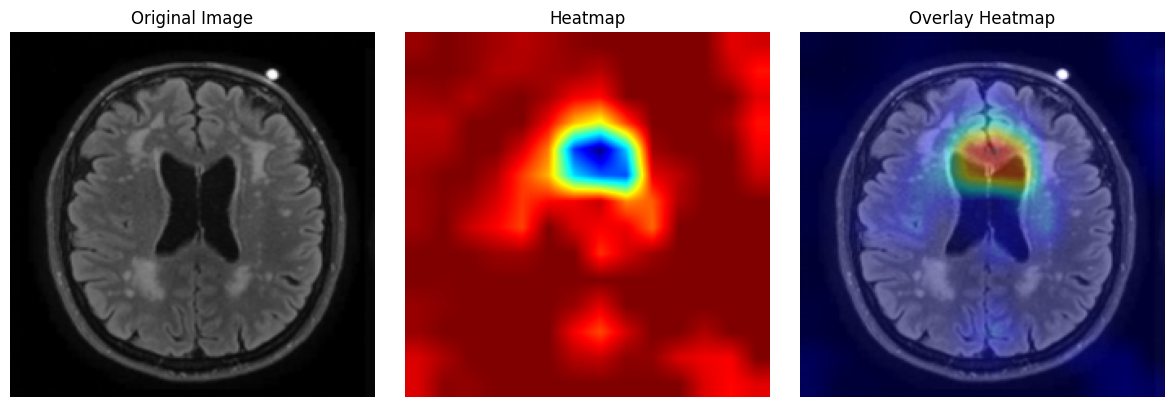

<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt
import cv2


# Preprocess the image
def load_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded_dims)

# Load and preprocess your image
img_path = '/content/drive/MyDrive/sampleImagesToTest/Tr-no_0205.jpg'  # Update with your path
preprocessed_img = load_preprocess_image(img_path)

# Grad-CAM algorithm
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# Create the heatmap
last_conv_layer_name = 'block5_conv3'  # Update with your last conv layer name
heatmap = make_gradcam_heatmap(preprocessed_img, model, last_conv_layer_name)

# Superimpose the heatmap over the original image
def save_and_display_gradcam(img_path, heatmap, alpha=0.4):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))  # Resize to the same size as model input
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))  # Resize heatmap
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = heatmap * alpha + img
    superimposed_img = np.clip(superimposed_img, 0, 255).astype(np.uint8)

    # Create a figure to display original, heatmap, and overlay
    plt.figure(figsize=(12, 4))

    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    # Heatmap
    plt.subplot(1, 3, 2)
    plt.imshow(heatmap)
    plt.title('Heatmap')
    plt.axis('off')

    # Overlay
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.title('Overlay Heatmap')
    plt.axis('off')

    # Show and save the figure
    plt.tight_layout()
    plt.show()
    plt.savefig('/content/drive/MyDrive/work_temp/gradcam_composite.jpg')

# Apply Grad-CAM
save_and_display_gradcam(img_path, heatmap)

**Test Three**

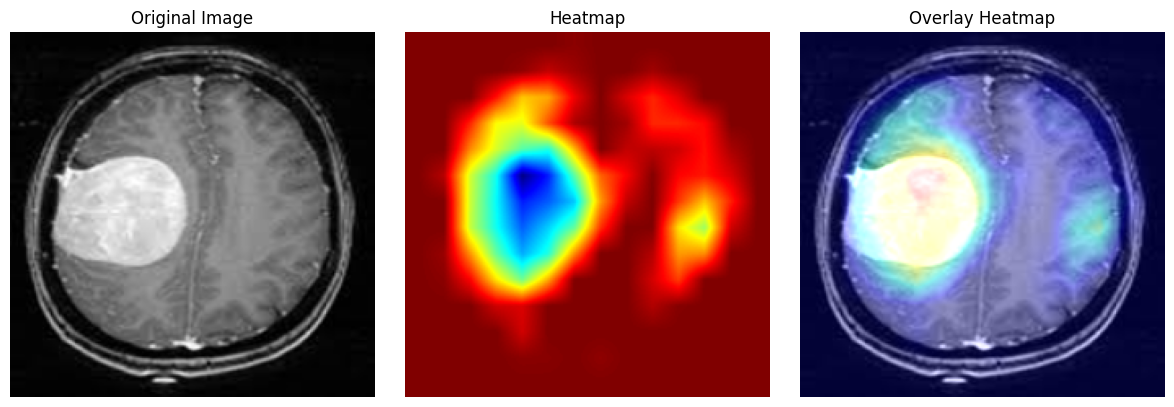

<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt
import cv2

model_path = '/content/drive/MyDrive/work_temp/model_vgg16_new'

# Load the pre-trained model
model = load_model(model_path)


# Preprocess the image
def load_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded_dims)

# Load and preprocess your image
img_path = '/content/drive/MyDrive/sampleImagesToTest/Y1.jpg'  # Update with your path
preprocessed_img = load_preprocess_image(img_path)

# Grad-CAM algorithm
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# Create the heatmap
last_conv_layer_name = 'block5_conv3'  # Update with your last conv layer name
heatmap = make_gradcam_heatmap(preprocessed_img, model, last_conv_layer_name)

# Superimpose the heatmap over the original image
def save_and_display_gradcam(img_path, heatmap, alpha=0.4):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))  # Resize to the same size as model input
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))  # Resize heatmap
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = heatmap * alpha + img
    superimposed_img = np.clip(superimposed_img, 0, 255).astype(np.uint8)

    # Create a figure to display original, heatmap, and overlay
    plt.figure(figsize=(12, 4))

    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    # Heatmap
    plt.subplot(1, 3, 2)
    plt.imshow(heatmap)
    plt.title('Heatmap')
    plt.axis('off')

    # Overlay
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.title('Overlay Heatmap')
    plt.axis('off')

    # Show and save the figure
    plt.tight_layout()
    plt.show()
    plt.savefig('/content/drive/MyDrive/work_temp/gradcam_composite.jpg')

# Apply Grad-CAM
save_and_display_gradcam(img_path, heatmap)


**--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**Five critical image samples for testing XAI**

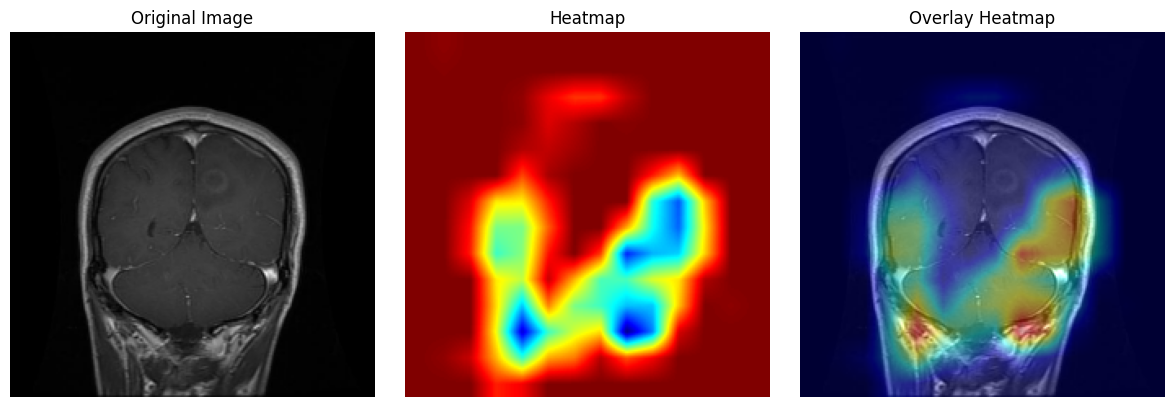

<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt
import cv2

model_path = '/content/drive/MyDrive/work_temp/model_vgg16_new'

# Load the pre-trained model
model = load_model(model_path)


# Preprocess the image
def load_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded_dims)

# Load and preprocess your image
img_path = '/content/drive/MyDrive/BadDay/Y2N (3149).jpg'  # Update with your path
preprocessed_img = load_preprocess_image(img_path)

# Grad-CAM algorithm
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# Create the heatmap
last_conv_layer_name = 'block5_conv3'  # Update with your last conv layer name
heatmap = make_gradcam_heatmap(preprocessed_img, model, last_conv_layer_name)

# Superimpose the heatmap over the original image
def save_and_display_gradcam(img_path, heatmap, alpha=0.4):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))  # Resize to the same size as model input
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))  # Resize heatmap
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = heatmap * alpha + img
    superimposed_img = np.clip(superimposed_img, 0, 255).astype(np.uint8)

    # Create a figure to display original, heatmap, and overlay
    plt.figure(figsize=(12, 4))

    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    # Heatmap
    plt.subplot(1, 3, 2)
    plt.imshow(heatmap)
    plt.title('Heatmap')
    plt.axis('off')

    # Overlay
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.title('Overlay Heatmap')
    plt.axis('off')

    # Show and save the figure
    plt.tight_layout()
    plt.show()
    plt.savefig('/content/drive/MyDrive/work_temp/gradcam_composite.jpg')

# Apply Grad-CAM
save_and_display_gradcam(img_path, heatmap)


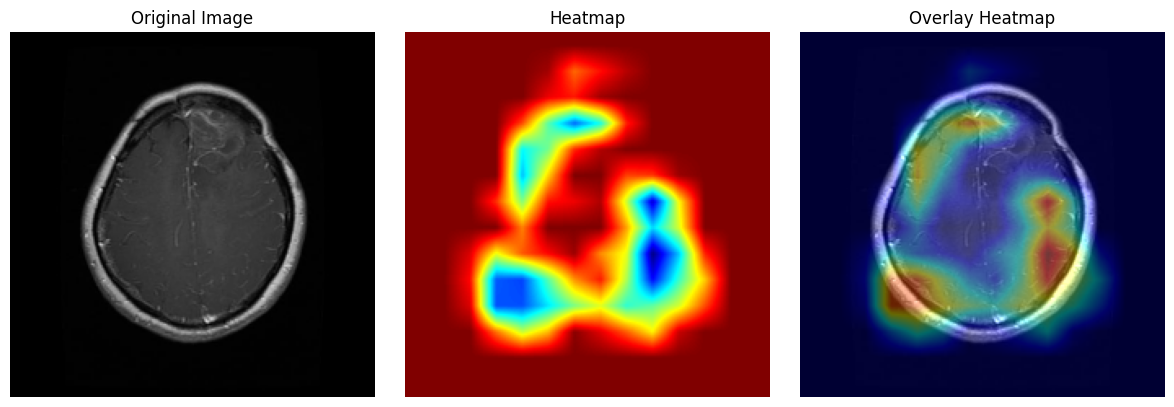

<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt
import cv2

model_path = '/content/drive/MyDrive/work_temp/model_vgg16_new'

# Load the pre-trained model
model = load_model(model_path)


# Preprocess the image
def load_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded_dims)

# Load and preprocess your image
img_path = '/content/drive/MyDrive/BadDay/Y2N (3115).jpg'  # Update with your path
preprocessed_img = load_preprocess_image(img_path)

# Grad-CAM algorithm
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# Create the heatmap
last_conv_layer_name = 'block5_conv3'  # Update with your last conv layer name
heatmap = make_gradcam_heatmap(preprocessed_img, model, last_conv_layer_name)

# Superimpose the heatmap over the original image
def save_and_display_gradcam(img_path, heatmap, alpha=0.4):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))  # Resize to the same size as model input
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))  # Resize heatmap
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = heatmap * alpha + img
    superimposed_img = np.clip(superimposed_img, 0, 255).astype(np.uint8)

    # Create a figure to display original, heatmap, and overlay
    plt.figure(figsize=(12, 4))

    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    # Heatmap
    plt.subplot(1, 3, 2)
    plt.imshow(heatmap)
    plt.title('Heatmap')
    plt.axis('off')

    # Overlay
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.title('Overlay Heatmap')
    plt.axis('off')

    # Show and save the figure
    plt.tight_layout()
    plt.show()
    plt.savefig('/content/drive/MyDrive/work_temp/gradcam_composite.jpg')

# Apply Grad-CAM
save_and_display_gradcam(img_path, heatmap)


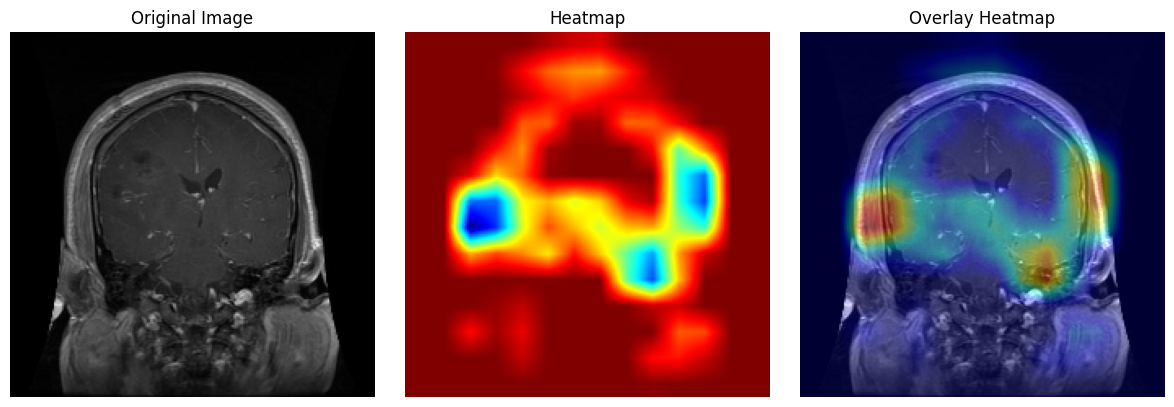

<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt
import cv2

model_path = '/content/drive/MyDrive/work_temp/model_vgg16_new'

# Load the pre-trained model
model = load_model(model_path)


# Preprocess the image
def load_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded_dims)

# Load and preprocess your image
img_path = '/content/drive/MyDrive/BadDay/Y2N (3014).jpg'  # Update with your path
preprocessed_img = load_preprocess_image(img_path)

# Grad-CAM algorithm
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# Create the heatmap
last_conv_layer_name = 'block5_conv3'  # Update with your last conv layer name
heatmap = make_gradcam_heatmap(preprocessed_img, model, last_conv_layer_name)

# Superimpose the heatmap over the original image
def save_and_display_gradcam(img_path, heatmap, alpha=0.4):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))  # Resize to the same size as model input
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))  # Resize heatmap
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = heatmap * alpha + img
    superimposed_img = np.clip(superimposed_img, 0, 255).astype(np.uint8)

    # Create a figure to display original, heatmap, and overlay
    plt.figure(figsize=(12, 4))

    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    # Heatmap
    plt.subplot(1, 3, 2)
    plt.imshow(heatmap)
    plt.title('Heatmap')
    plt.axis('off')

    # Overlay
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.title('Overlay Heatmap')
    plt.axis('off')

    # Show and save the figure
    plt.tight_layout()
    plt.show()
    plt.savefig('/content/drive/MyDrive/work_temp/gradcam_composite.jpg')

# Apply Grad-CAM
save_and_display_gradcam(img_path, heatmap)


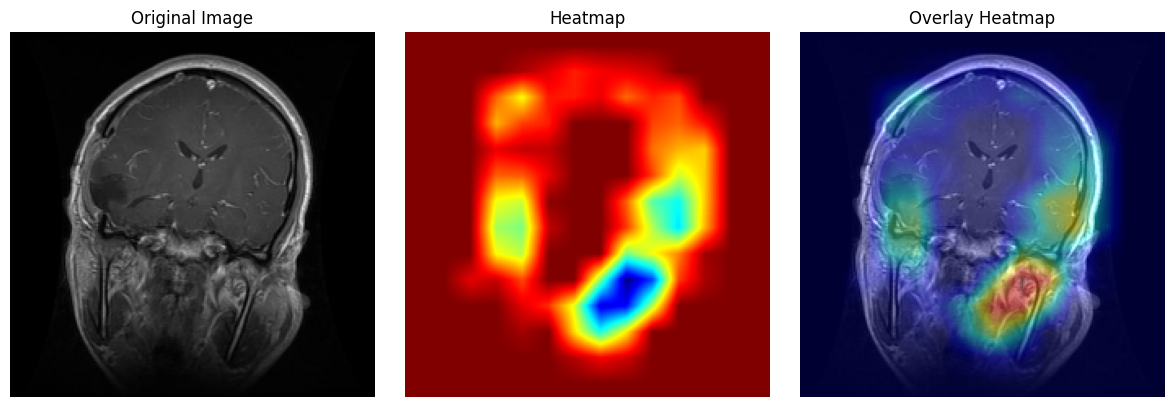

<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt
import cv2

model_path = '/content/drive/MyDrive/work_temp/model_vgg16_new'

# Load the pre-trained model
model = load_model(model_path)


# Preprocess the image
def load_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded_dims)

# Load and preprocess your image
img_path = '/content/drive/MyDrive/BadDay/Y2N (3007).jpg'  # Update with your path
preprocessed_img = load_preprocess_image(img_path)

# Grad-CAM algorithm
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# Create the heatmap
last_conv_layer_name = 'block5_conv3'  # Update with your last conv layer name
heatmap = make_gradcam_heatmap(preprocessed_img, model, last_conv_layer_name)

# Superimpose the heatmap over the original image
def save_and_display_gradcam(img_path, heatmap, alpha=0.4):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))  # Resize to the same size as model input
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))  # Resize heatmap
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = heatmap * alpha + img
    superimposed_img = np.clip(superimposed_img, 0, 255).astype(np.uint8)

    # Create a figure to display original, heatmap, and overlay
    plt.figure(figsize=(12, 4))

    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    # Heatmap
    plt.subplot(1, 3, 2)
    plt.imshow(heatmap)
    plt.title('Heatmap')
    plt.axis('off')

    # Overlay
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.title('Overlay Heatmap')
    plt.axis('off')

    # Show and save the figure
    plt.tight_layout()
    plt.show()
    plt.savefig('/content/drive/MyDrive/work_temp/gradcam_composite.jpg')

# Apply Grad-CAM
save_and_display_gradcam(img_path, heatmap)


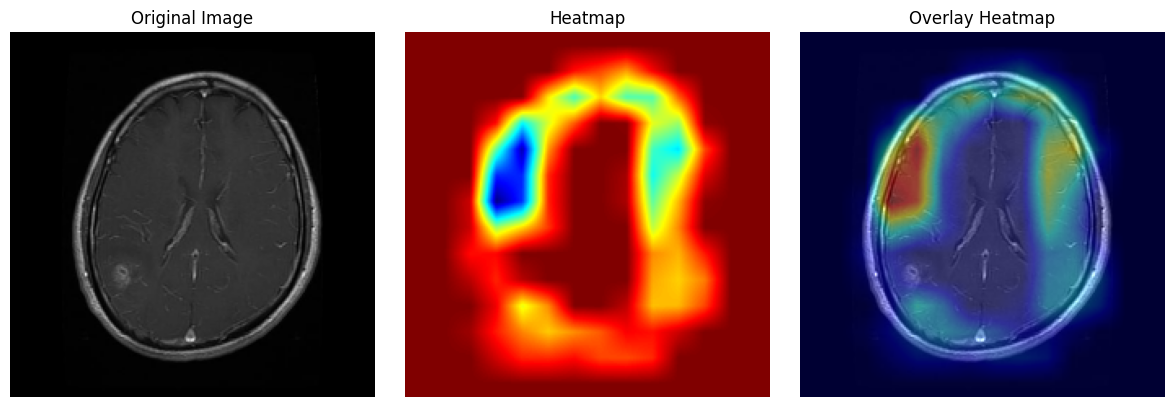

<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt
import cv2

model_path = '/content/drive/MyDrive/work_temp/model_vgg16_new'

# Load the pre-trained model
model = load_model(model_path)


# Preprocess the image
def load_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded_dims)

# Load and preprocess your image
img_path = '/content/drive/MyDrive/BadDay/Y2N (2974).jpg'  # Update with your path
preprocessed_img = load_preprocess_image(img_path)

# Grad-CAM algorithm
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# Create the heatmap
last_conv_layer_name = 'block5_conv3'  # Update with your last conv layer name
heatmap = make_gradcam_heatmap(preprocessed_img, model, last_conv_layer_name)

# Superimpose the heatmap over the original image
def save_and_display_gradcam(img_path, heatmap, alpha=0.4):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))  # Resize to the same size as model input
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))  # Resize heatmap
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = heatmap * alpha + img
    superimposed_img = np.clip(superimposed_img, 0, 255).astype(np.uint8)

    # Create a figure to display original, heatmap, and overlay
    plt.figure(figsize=(12, 4))

    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    # Heatmap
    plt.subplot(1, 3, 2)
    plt.imshow(heatmap)
    plt.title('Heatmap')
    plt.axis('off')

    # Overlay
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.title('Overlay Heatmap')
    plt.axis('off')

    # Show and save the figure
    plt.tight_layout()
    plt.show()
    plt.savefig('/content/drive/MyDrive/work_temp/gradcam_composite.jpg')

# Apply Grad-CAM
save_and_display_gradcam(img_path, heatmap)


**Layerwise relevance propagation (LRP)**

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.9/489.9 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 86.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 38.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 74.3 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-oauthlib 1.2.0
    Uninstalling google-auth-oauthlib-1.2.0:
      Successfully uninstalled google-auth-oauthlib-1.2.0
  Attempting uninstall: ten

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


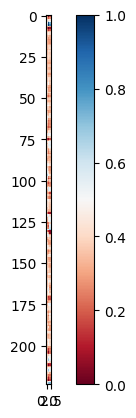

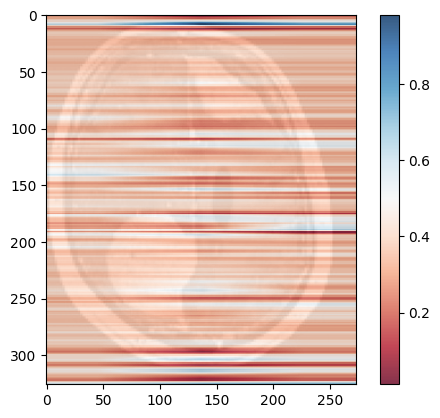

In [3]:
!pip install innvestigate
from keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
import innvestigate.utils as iutils
import innvestigate
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

# Set the paths for the model and image
model_path = '/content/drive/MyDrive/work_temp/model_vgg16_new'
img_path = '/content/drive/MyDrive/sampleImagesToTest/Y2N (21).jpg' # Replace with your image path

# Load the pre-trained model
model = load_model(model_path)

# Preprocess the MRI image
# This preprocessing should be the same as you used when you trained your VGG16 model
def preprocess_image(image_path):
    from keras.preprocessing import image
    from keras.applications.vgg16 import preprocess_input

    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

input_image = preprocess_image(img_path)

# Removing the softmax layer from the model to make it compatible with LRP
layer_output = model.layers[-2].output
model_wo_softmax = Model(inputs=model.input, outputs=layer_output)

# Create an LRP analyzer
analyzer = innvestigate.create_analyzer('lrp.z', model_wo_softmax)

# Analyze the image with LRP
analysis = analyzer.analyze(input_image)

# Postprocess the analysis to visualize it as a heatmap
# Sum over the color channels and normalize the values
heatmap = np.sum(analysis, axis=1)
heatmap = np.squeeze(heatmap)
heatmap = (heatmap - np.min(heatmap)) / (np.max(heatmap) - np.min(heatmap))

# Display the heatmap
plt.imshow(heatmap, cmap='RdBu', interpolation='nearest')
plt.colorbar()
plt.show()

# Load the original image
original_img = plt.imread(img_path)

# Resize heatmap to the size of the original image
import cv2
heatmap_resized = cv2.resize(heatmap, (original_img.shape[1], original_img.shape[0]))

# Overlay the heatmap on the original image
plt.imshow(original_img, cmap='gray', alpha=0.5)
plt.imshow(heatmap_resized, cmap='RdBu', alpha=0.8, interpolation='nearest')
plt.colorbar()
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


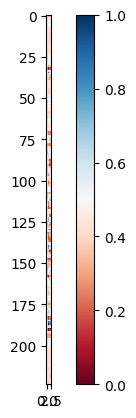

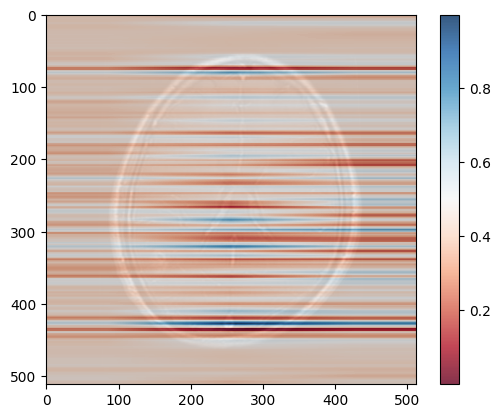

In [ ]:
!pip install innvestigate
from keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
import innvestigate.utils as iutils
import innvestigate
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

# Set the paths for the model and image
model_path = '/content/drive/MyDrive/work_temp/model_vgg16_new'
img_path = '/content/drive/MyDrive/BadDay/Y2N (2974).jpg' # Replace with your image path

# Load the pre-trained model
model = load_model(model_path)

# Preprocess the MRI image
# This preprocessing should be the same as you used when you trained your VGG16 model
def preprocess_image(image_path):
    from keras.preprocessing import image
    from keras.applications.vgg16 import preprocess_input

    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

input_image = preprocess_image(img_path)

# Removing the softmax layer from the model to make it compatible with LRP
layer_output = model.layers[-2].output
model_wo_softmax = Model(inputs=model.input, outputs=layer_output)

# Create an LRP analyzer
analyzer = innvestigate.create_analyzer('lrp.z', model_wo_softmax)

# Analyze the image with LRP
analysis = analyzer.analyze(input_image)

# Postprocess the analysis to visualize it as a heatmap
# Sum over the color channels and normalize the values
heatmap = np.sum(analysis, axis=1)
heatmap = np.squeeze(heatmap)
heatmap = (heatmap - np.min(heatmap)) / (np.max(heatmap) - np.min(heatmap))

# Display the heatmap
plt.imshow(heatmap, cmap='RdBu', interpolation='nearest')
plt.colorbar()
plt.show()

# Load the original image
original_img = plt.imread(img_path)

# Resize heatmap to the size of the original image
import cv2
heatmap_resized = cv2.resize(heatmap, (original_img.shape[1], original_img.shape[0]))

# Overlay the heatmap on the original image
plt.imshow(original_img, cmap='gray', alpha=0.9)
plt.imshow(heatmap_resized, cmap='RdBu', alpha=0.8, interpolation='nearest')
plt.colorbar()
plt.show()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.9/489.9 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 87.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 43.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 78.4 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-oauthlib 1.2.0
    Uninstalling google-auth-oauthlib-1.2.0:
      Successfully uninstalled google-auth-oauthlib-1.2.0
  Attempting uninstall: ten

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


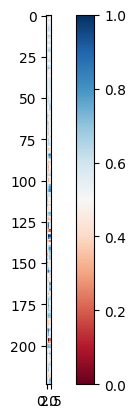

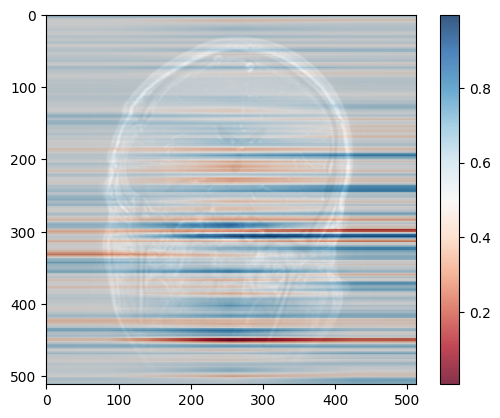

In [2]:
!pip install innvestigate
from keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
import innvestigate.utils as iutils
import innvestigate
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

# Set the paths for the model and image
model_path = '/content/drive/MyDrive/work_temp/model_vgg16_new'
img_path = '/content/drive/MyDrive/BadDay/Y2N (3007).jpg' # Replace with your image path

# Load the pre-trained model
model = load_model(model_path)

# Preprocess the MRI image
# This preprocessing should be the same as you used when you trained your VGG16 model
def preprocess_image(image_path):
    from keras.preprocessing import image
    from keras.applications.vgg16 import preprocess_input

    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

input_image = preprocess_image(img_path)

# Removing the softmax layer from the model to make it compatible with LRP
layer_output = model.layers[-2].output
model_wo_softmax = Model(inputs=model.input, outputs=layer_output)

# Create an LRP analyzer
analyzer = innvestigate.create_analyzer('lrp.z', model_wo_softmax)

# Analyze the image with LRP
analysis = analyzer.analyze(input_image)

# Postprocess the analysis to visualize it as a heatmap
# Sum over the color channels and normalize the values
heatmap = np.sum(analysis, axis=1)
heatmap = np.squeeze(heatmap)
heatmap = (heatmap - np.min(heatmap)) / (np.max(heatmap) - np.min(heatmap))

# Display the heatmap
plt.imshow(heatmap, cmap='RdBu', interpolation='nearest')
plt.colorbar()
plt.show()

# Load the original image
original_img = plt.imread(img_path)

# Resize heatmap to the size of the original image
import cv2
heatmap_resized = cv2.resize(heatmap, (original_img.shape[1], original_img.shape[0]))

# Overlay the heatmap on the original image
plt.imshow(original_img, cmap='gray', alpha=0.9)
plt.imshow(heatmap_resized, cmap='RdBu', alpha=0.8, interpolation='nearest')
plt.colorbar()
plt.show()



**SHAP EXPLANATION**

Index 0 is for 'No Tumor'.
Blue indicates pixels that have a negative SHAP value for the prediction. This means these pixels are contributing against the predicted class, which means predicting against the 'No Tumor' class. In other words, these areas are lowering the model's output value for the class that is being explained.

In [6]:
!pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 9.4 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/shap/explainers/_deep/deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")
/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:452: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


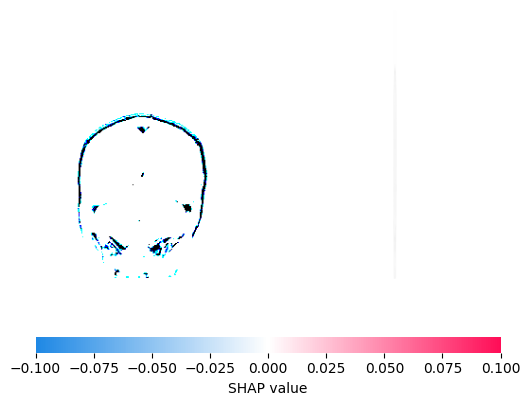

In [11]:
import shap
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image

# Path to the saved model and the image to be analyzed
model_path = '/content/drive/MyDrive/work_temp/model_vgg16_new'
img_path = '/content/drive/MyDrive/BadDay/Y2N (3149).jpg'  # Update this to the path of your image

# Load the pre-trained model
model = load_model(model_path)

# Function to load and preprocess the image
def load_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

# Load and preprocess the image
x = load_preprocess_image(img_path)

# Create a SHAP DeepExplainer
explainer = shap.DeepExplainer(model, x)

# Compute SHAP values
shap_values = explainer.shap_values(x)

# Plot the SHAP values
# The index in shap_values[1] should correspond to the class you are interested in.
# For a binary classifier: index 0 for 'No Tumor', index 1 for 'Tumor'
shap.image_plot(shap_values[0], -x)


/usr/local/lib/python3.10/dist-packages/shap/explainers/_deep/deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")
/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:452: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


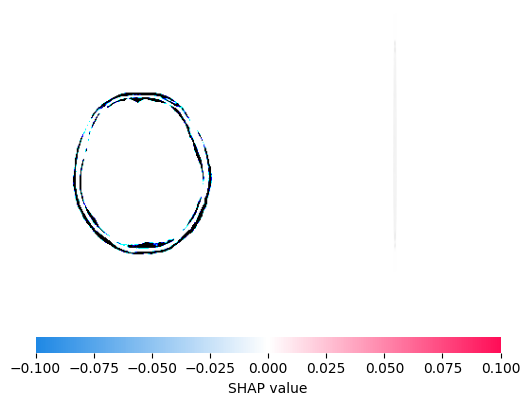

In [ ]:

import shap
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image

# Path to the saved model and the image to be analyzed
model_path = '/content/drive/MyDrive/work_temp/model_vgg16_new'
img_path = '/content/drive/MyDrive/sampleImagesToTest/48 no.jpeg'  # Update this to the path of your image

# Load the pre-trained model
model = load_model(model_path)

# Function to load and preprocess the image
def load_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

# Load and preprocess the image
x = load_preprocess_image(img_path)

# Create a SHAP DeepExplainer
explainer = shap.DeepExplainer(model, x)

# Compute SHAP values
shap_values = explainer.shap_values(x)

# Plot the SHAP values
# The index in shap_values[1] should correspond to the class you are interested in.
# For a binary classifier: index 0 for 'No Tumor', index 1 for 'Tumor'
shap.image_plot(shap_values[0], -x)


/usr/local/lib/python3.10/dist-packages/shap/explainers/_deep/deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")
/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:452: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


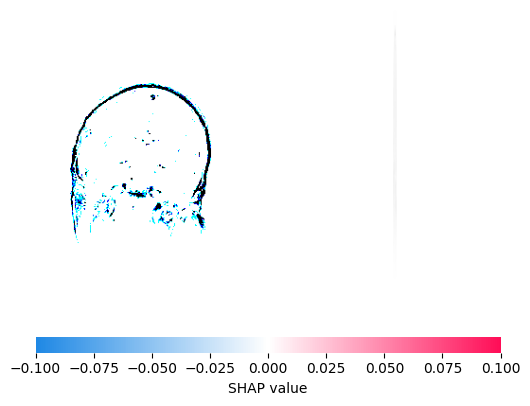

In [17]:
import shap
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image

# Path to the saved model and the image to be analyzed
model_path = '/content/drive/MyDrive/work_temp/model_vgg16_new'
img_path = '/content/drive/MyDrive/BadDay/Y2N (3007).jpg'

# Load the pre-trained model
model = load_model(model_path)

# Function to load and preprocess the image
def load_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

# Load and preprocess the image
x = load_preprocess_image(img_path)

# Create a SHAP DeepExplainer
explainer = shap.DeepExplainer(model, x)

# Compute SHAP values
shap_values = explainer.shap_values(x)

# Plot the SHAP values
# The index in shap_values[1] should correspond to the class you are interested in.
# For a binary classifier: index 0 for 'No Tumor', index 1 for 'Tumor'
shap.image_plot(shap_values[0], -x)


**Counterfactual Explanation**

Counterfactual Explanations (CE) works by generating masked images by applying black square masks to specified positions. By comparing the model predictions on original and masked images, it provides insights into the importance of different image regions for the model's decisions. The change in predictions after masking helps understand which regions contribute most to the model's diagnosis.

**FOR LIME**

1/1 [==============================] - 1s 984ms/step
Original Prediction: [[0.28626528 0.7137347 ]]
Masked Prediction: [[0.36895424 0.63104576]]


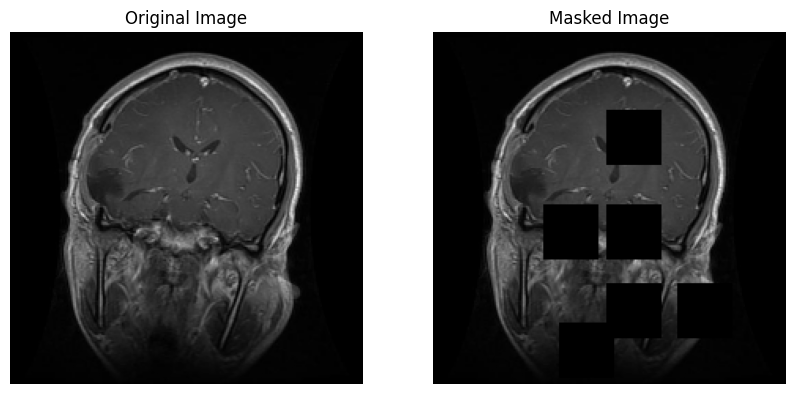

In [44]:
import numpy as np
import matplotlib.pyplot as plt

model_path = '/content/drive/MyDrive/work_temp/model_vgg16_new'

# Load the pre-trained model
model = load_model(model_path)

def apply_masks(img_array, size=50, positions=[(100, 100)], direction='top_right'):
    """ Apply square black masks to given positions on the image array """
    masked_img = np.copy(img_array)
    for position in positions:
        x, y = position
        if direction == 'top_right':
            x_end = max(0, x - size)
            y_end = max(0, y - size)
            masked_img[x_end:x, y_end:y+4, :] = 0
        elif direction == 'bottom_left':
            masked_img[x:x+size, y:y+size, :] = 0
        elif direction == 'very_bottom':
            masked_img[-size:, :, :] = 0
        # Add more conditions for other directions if needed
    return masked_img

def load_and_preprocess_image(img_path):
    """ Load and preprocess image """
    # Load image
    img = cv2.imread(img_path)
    # Resize if needed
    img = cv2.resize(img, (224, 224))
    # Preprocess according to your model's requirements
    # For example, if using a pre-trained model, you might need to normalize the image
    img = img.astype('float32') / 255.0  # Normalize to [0,1]
    # Perform any other preprocessing steps specific to your model
    return img


# Example usage
img_path = '/content/drive/MyDrive/BadDay/Y2N (3007).jpg'
original_img_array = load_and_preprocess_image(img_path)

# (100, 80), (120, 140) (10,90)]

# Define multiple mask positions
mask_positions = [(110, 110),(110, 70),(50, 110),(160, 110),(185, 80) ,(160, 155)]   # change positions of the masks

masked_img_array = apply_masks(original_img_array, size=35, positions=mask_positions, direction='bottom_left')
masked_img_array_expanded = np.expand_dims(masked_img_array, axis=0)
original_img_array_expanded = np.expand_dims(original_img_array, axis=0)

original_pred = model.predict(original_img_array_expanded)
masked_pred = model.predict(masked_img_array_expanded)

print("Original Prediction:", original_pred)
print("Masked Prediction:", masked_pred)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(original_img_array)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(masked_img_array)
plt.title('Masked Image')
plt.axis('off')
plt.show()

Original Prediction: The model is 72.08% confident that the image contains a tumor and 27.92% confident that it does not contain a tumor.
Masked Prediction: After masking a certain region of the image, the model became less confident about the presence of a tumor, with a confidence of     58.94% for tumor presence and 41.06% for tumor absence.

**FOR SHAP**

1/1 [==============================] - 1s 809ms/step
Original Prediction: [[0.28626528 0.7137347 ]]
Masked Prediction: [[0.48279983 0.51720023]]


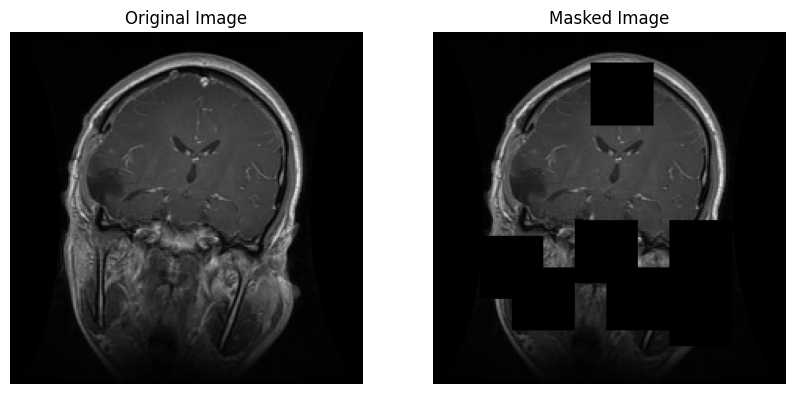

In [72]:
import numpy as np
import matplotlib.pyplot as plt

model_path = '/content/drive/MyDrive/work_temp/model_vgg16_new'

# Load the pre-trained model
model = load_model(model_path)

def apply_masks(img_array, size=50, positions=[(100, 100)], direction='top_right'):
    """ Apply square black masks to given positions on the image array """
    masked_img = np.copy(img_array)
    for position in positions:
        x, y = position
        if direction == 'top_right':
            x_end = max(0, x - size)
            y_end = max(0, y - size)
            masked_img[x_end:x, y_end:y+4, :] = 0
        elif direction == 'bottom_left':
            masked_img[x:x+size, y:y+size, :] = 0
        elif direction == 'very_bottom':
            masked_img[-size:, :, :] = 0
        # Add more conditions for other directions if needed
    return masked_img

def load_and_preprocess_image(img_path):
    """ Load and preprocess image """
    # Load image
    img = cv2.imread(img_path)
    # Resize if needed
    img = cv2.resize(img, (224, 224))
    # Preprocess according to your model's requirements
    # For example, if using a pre-trained model, you might need to normalize the image
    img = img.astype('float32') / 255.0  # Normalize to [0,1]
    # Perform any other preprocessing steps specific to your model
    return img


# Example usage
img_path = '/content/drive/MyDrive/BadDay/Y2N (3007).jpg'
original_img_array = load_and_preprocess_image(img_path)

# (100, 80), (120, 140) (10,90)]

# Define multiple mask positions
mask_positions = [(20, 100),(120, 90),(150, 110),(120, 150),(160, 150),(150, 50),(130, 30)]   # change positions of the masks

masked_img_array = apply_masks(original_img_array, size=40, positions=mask_positions, direction='bottom_left')
masked_img_array_expanded = np.expand_dims(masked_img_array, axis=0)
original_img_array_expanded = np.expand_dims(original_img_array, axis=0)

original_pred = model.predict(original_img_array_expanded)
masked_pred = model.predict(masked_img_array_expanded)

print("Original Prediction:", original_pred)
print("Masked Prediction:", masked_pred)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(original_img_array)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(masked_img_array)
plt.title('Masked Image')
plt.axis('off')
plt.show()

**For GRADCAM**

1/1 [==============================] - 1s 707ms/step
Original Prediction: [[0.28626528 0.7137347 ]]
Masked Prediction: [[0.4340752  0.56592476]]


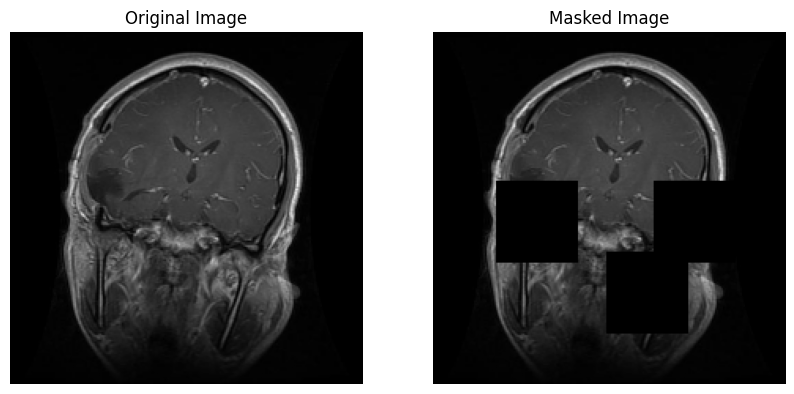

In [82]:
import numpy as np
import matplotlib.pyplot as plt

model_path = '/content/drive/MyDrive/work_temp/model_vgg16_new'

# Load the pre-trained model
model = load_model(model_path)

def apply_masks(img_array, size=50, positions=[(100, 100)], direction='top_right'):
    """ Apply square black masks to given positions on the image array """
    masked_img = np.copy(img_array)
    for position in positions:
        x, y = position
        if direction == 'top_right':
            x_end = max(0, x - size)
            y_end = max(0, y - size)
            masked_img[x_end:x, y_end:y+4, :] = 0
        elif direction == 'bottom_left':
            masked_img[x:x+size, y:y+size, :] = 0
        elif direction == 'very_bottom':
            masked_img[-size:, :, :] = 0
        # Add more conditions for other directions if needed
    return masked_img

def load_and_preprocess_image(img_path):
    """ Load and preprocess image """
    # Load image
    img = cv2.imread(img_path)
    # Resize if needed
    img = cv2.resize(img, (224, 224))
    # Preprocess according to your model's requirements
    # For example, if using a pre-trained model, you might need to normalize the image
    img = img.astype('float32') / 255.0  # Normalize to [0,1]
    # Perform any other preprocessing steps specific to your model
    return img


# Example usage
img_path = '/content/drive/MyDrive/BadDay/Y2N (3007).jpg'
original_img_array = load_and_preprocess_image(img_path)

# (100, 80), (120, 140) (10,90)]

# Define multiple mask positions
mask_positions = [(140, 110)]   # change positions of the masks

masked_img_array = apply_masks(original_img_array, size=52, positions=mask_positions, direction='bottom_left')
masked_img_array_expanded = np.expand_dims(masked_img_array, axis=0)
original_img_array_expanded = np.expand_dims(original_img_array, axis=0)

original_pred = model.predict(original_img_array_expanded)
masked_pred = model.predict(masked_img_array_expanded)

print("Original Prediction:", original_pred)
print("Masked Prediction:", masked_pred)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(original_img_array)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(masked_img_array)
plt.title('Masked Image')
plt.axis('off')
plt.show()

**FOR LRP**

1/1 [==============================] - 0s 462ms/step
Original Prediction: [[0.28626528 0.7137347 ]]
Masked Prediction: [[0.4242199  0.57578015]]


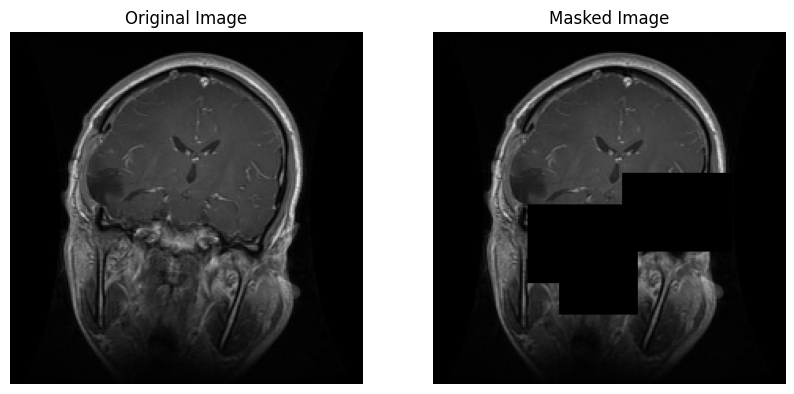

In [22]:
import numpy as np
import matplotlib.pyplot as plt

model_path = '/content/drive/MyDrive/work_temp/model_vgg16_new'

# Load the pre-trained model
model = load_model(model_path)

def apply_masks(img_array, size=60, positions=[(100, 100)], direction='top_right'):
    """ Apply square black masks to given positions on the image array """
    masked_img = np.copy(img_array)
    for position in positions:
        x, y = position
        if direction == 'top_right':
            x_end = max(0, x - size)
            y_end = max(0, y - size)
            masked_img[x_end:x, y_end:y+4, :] = 0
        elif direction == 'bottom_left':
            masked_img[x:x+size, y:y+size, :] = 0
        elif direction == 'very_bottom':
            masked_img[-size:, :, :] = 0
        # Add more conditions for other directions if needed
    return masked_img

def load_and_preprocess_image(img_path):
    """ Load and preprocess image """
    # Load image
    img = cv2.imread(img_path)
    # Resize if needed
    img = cv2.resize(img, (224, 224))
    # Preprocess according to your model's requirements
    # For example, if using a pre-trained model, you might need to normalize the image
    img = img.astype('float32') / 255.0  # Normalize to [0,1]
    # Perform any other preprocessing steps specific to your model
    return img


# Example usage
img_path = '/content/drive/MyDrive/BadDay/Y2N (3007).jpg'
original_img_array = load_and_preprocess_image(img_path)

# (100, 80), (120, 140) (10,90)]

# Define multiple mask positions
mask_positions = [(110, 80),(90, 140),(90, 120),(130,80),(110, 60)]   # change positions of the masks

masked_img_array = apply_masks(original_img_array, size=50, positions=mask_positions, direction='bottom_left')
masked_img_array_expanded = np.expand_dims(masked_img_array, axis=0)
original_img_array_expanded = np.expand_dims(original_img_array, axis=0)

original_pred = model.predict(original_img_array_expanded)
masked_pred = model.predict(masked_img_array_expanded)

print("Original Prediction:", original_pred)
print("Masked Prediction:", masked_pred)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(original_img_array)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(masked_img_array)
plt.title('Masked Image')
plt.axis('off')
plt.show()